# 06 - Grouped and Dummy Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression

import os
import typing

style.use("fivethirtyeight")

## Groupped Data

In [2]:
wage_path = './wage.csv'
wage_url = 'https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/refs/heads/master/causal-inference-for-the-brave-and-true/data/wage.csv'
if os.path.exists(wage_path):
    data = pd.read_csv(wage_path)
else:
    data = pd.read_csv(wage_url)
    data.to_csv(wage_path)

data[['wage', 'lhwage', 'educ', 'IQ']].head()

,wage,lhwage,educ,IQ
0,769,2.956212,12,93
1,808,2.782539,18,119
2,825,3.026504,14,108
3,650,2.788093,12,96
4,562,2.642622,11,74


In [3]:
groups = (
    data
    .assign(count=1)
    .groupby("educ")
    .agg({
        "lhwage":"mean",
        "count":"count",
    }).reset_index()
)

groups['std'] = data.assign(count=1).groupby('educ')[['lhwage']].std().reset_index().lhwage
groups['mean_std'] = groups['std'] / groups['count'] ** 0.5

groups

,educ,lhwage,count,std,mean_std
0,9,2.856475,10,0.391895,0.123928
1,10,2.786911,35,0.450687,0.076180
2,11,2.855997,43,0.373390,0.056941
3,12,2.922168,393,0.439278,0.022159
4,13,3.021182,85,0.466663,0.050617
5,14,3.042352,77,0.421019,0.047980
6,15,3.090766,45,0.506318,0.075477
7,16,3.176184,150,0.402615,0.032873
8,17,3.246566,40,0.448649,0.070938
9,18,3.144257,57,0.488274,0.064673


Text(0.5, 1.0, 'Personal Data')

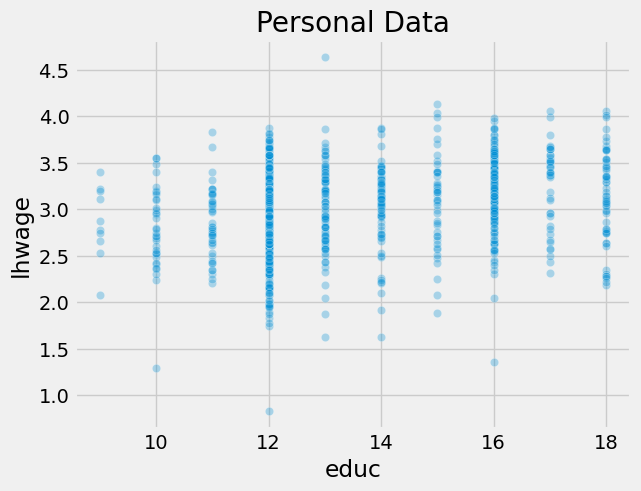

In [4]:
sns.scatterplot(x=data.educ, y=data.lhwage, alpha=0.3)
plt.title("Personal Data")

Text(0.5, 1.0, 'Groupped Data')

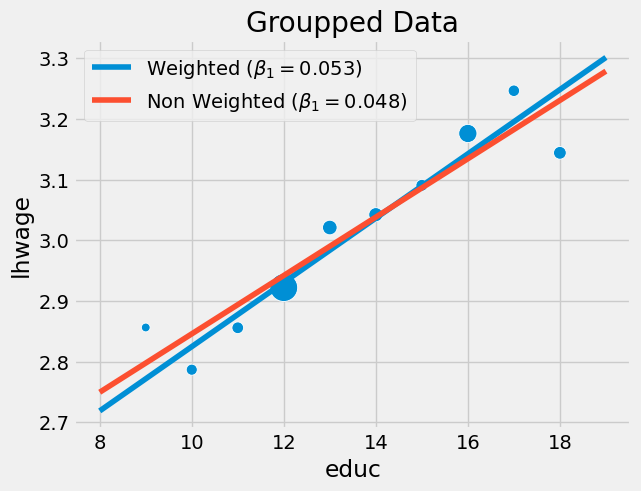

In [16]:
from sklearn.linear_model import LinearRegression

model_weighted = LinearRegression().fit(groups[['educ']], groups.lhwage, sample_weight=groups['count'])
model_nonweighted = LinearRegression().fit(groups[['educ']], groups.lhwage)
x = np.linspace(groups.educ.min() - 1, groups.educ.max() + 1, 10)

sns.scatterplot(x=groups.educ, y=groups.lhwage, size=groups['count'], legend=False, sizes=(40, 400))
sns.lineplot(x=x, y=model_weighted.predict(pd.DataFrame({"educ":x})), label=fr"Weighted ($\beta_1 = {model_weighted.coef_[0]:.03f}$)")
sns.lineplot(x=x, y=model_nonweighted.predict(pd.DataFrame({"educ":x})), label=fr"Non Weighted ($\beta_1 = {model_nonweighted.coef_[0]:.03f}$)")
plt.title(fr"Groupped Data")